# Convolutions and Dimensions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
from scipy.signal import convolve2d
import numpy as np
%matplotlib inline

### Convlutions 


In [ ]:
k1 = np.array([ [0 ,0, 0], [0 ,1 ,0], [0 ,0 ,0] ])
k2 = np.array([ [0, 0 ,0], [0, 0, 1], [0, 0 ,0] ])
k3 = np.array([ [-1,-1 ,-1], [-1, 8 ,-1], [-1, -1, -1] ])
k4 = np.array([ [1 ,1,1], [1, 1 ,1], [1, 1 ,1] ] )/ 9

In [ ]:
k1

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [ ]:
k2

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [ ]:
k3

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [ ]:
k4

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

#### Apply to arrays (20 points)
Apply the convolutions above to the following array, using numpy:


In [ ]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

In [ ]:
# Write your answer here

In [ ]:
import numpy as np

def convolve(image, kernel):
    # Get the dimensions of the image and the kernel
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    
    # Calculate the padding required for the convolution
    pad_height = kernel_rows // 2
    pad_width = kernel_cols // 2
    
    # Create an output image with the same dimensions as the input image
    output = np.zeros_like(image)
    
    # Pad the image with zeros
    padded_image = np.zeros((image_rows + 2*pad_height, image_cols + 2*pad_width))
    padded_image[pad_height:-pad_height, pad_width:-pad_width] = image
    
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel)) # updown and leftright
    
    # Perform the convolution
    for row in range(image_rows):
        for col in range(image_cols):
            output[row, col] = np.sum(kernel * padded_image[row:row+kernel_rows, col:col+kernel_cols])
    
    return output

In [ ]:

# Apply convolution with convolve2d
output1 = convolve2d(x, k1,mode='same')
output2 = convolve2d(x, k2,mode='same')
output3 = convolve2d(x, k3,mode='same')
output4 = convolve2d(x, k4,mode='same')
# Apply convolution with numpy:
my_output1 = convolve(x, k1)
my_output2 = convolve(x, k2)
my_output3 = convolve(x, k3)
my_output4 = convolve(x, k4)

print("Output after convolution with k1:\n", output1)
print("Output after my_convolve2d with k1:\n", my_output1)
print()
print("Output after convolution with k2:\n", output2)
print("Output after my_convolve2d with k2:\n", my_output2)
print()

print("Output after convolution with k3:\n", output3)
print("Output after my_convolve2d with k3:\n", my_output3)
print()

print("Output after convolution with k4:\n", output4)
print("Output after my_convolve2d with k4:\n", my_output4)

Output after convolution with k1:
 [[-1 -3 -4  0 -1]
 [ 2 -2 -4  0 -2]
 [-3 -2  2  2  3]
 [ 0 -3 -4 -4 -2]
 [-4 -2  2  0  1]]
Output after my_convolve2d with k1:
 [[-1 -3 -4  0 -1]
 [ 2 -2 -4  0 -2]
 [-3 -2  2  2  3]
 [ 0 -3 -4 -4 -2]
 [-4 -2  2  0  1]]

Output after convolution with k2:
 [[ 0 -1 -3 -4  0]
 [ 0  2 -2 -4  0]
 [ 0 -3 -2  2  2]
 [ 0  0 -3 -4 -4]
 [ 0 -4 -2  2  0]]
Output after my_convolve2d with k2:
 [[ 0 -1 -3 -4  0]
 [ 0  2 -2 -4  0]
 [ 0 -3 -2  2  2]
 [ 0  0 -3 -4 -4]
 [ 0 -4 -2  2  0]]

Output after convolution with k3:
 [[ -5 -15 -23  11  -6]
 [ 27  -3 -25   4 -20]
 [-19  -4  33  27  30]
 [ 14 -13 -27 -36 -18]
 [-27  -7  29   7  14]]
Output after my_convolve2d with k3:
 [[ -5 -15 -23  11  -6]
 [ 27  -3 -25   4 -20]
 [-19  -4  33  27  30]
 [ 14 -13 -27 -36 -18]
 [-27  -7  29   7  14]]

Output after convolution with k4:
 [[-4.44444444e-01 -1.33333333e+00 -1.44444444e+00 -1.22222222e+00
  -3.33333333e-01]
 [-1.00000000e+00 -1.66666667e+00 -1.22222222e+00 -4.44444444e-01

The mode='same' option ensures that the output has the same size as the input, which means that the edges are padded with zeros to ensure that the kernel is fully applied to all pixels.  the convolution can also be done  with "full"

#### Apply to images (20 points)
Apply the convolution filters above on the image. You should convert the image to grayscale, and apply the filters on the grayscale image. 
Show the results:

<ipython-input-24-fd7cb8a12b84>:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = scipy.misc.face()


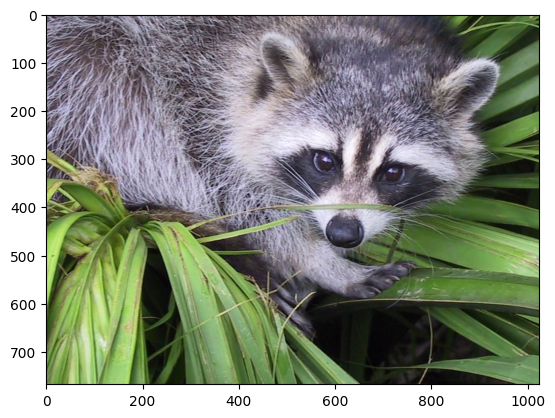

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
face = scipy.misc.face()
plt.imshow(face); plt.show()

In [ ]:
# Write your answer here


<ipython-input-26-24ca8fda84d6>:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = face = scipy.misc.face()


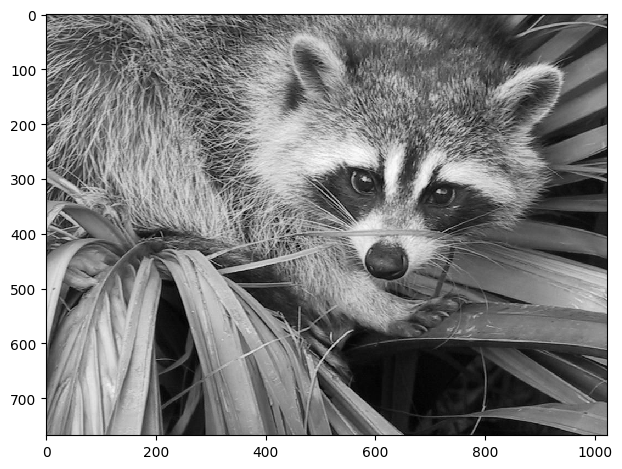

In [ ]:
from skimage import color
from skimage import io

img = face = scipy.misc.face()

imgGray = color.rgb2gray(img)

io.imshow(imgGray)

In [ ]:
x = imgGray

In [ ]:
# Apply convolution with k1,2,3,4
output1 = convolve2d(x, k1, mode='same')
output2 = convolve2d(x, k2, mode='same')
output3 = convolve2d(x, k3, mode='same')
output4 = convolve2d(x, k4, mode='same')

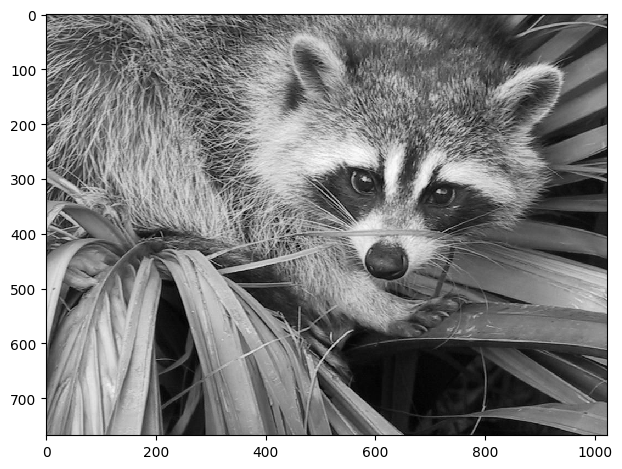

In [ ]:
io.imshow(output1)

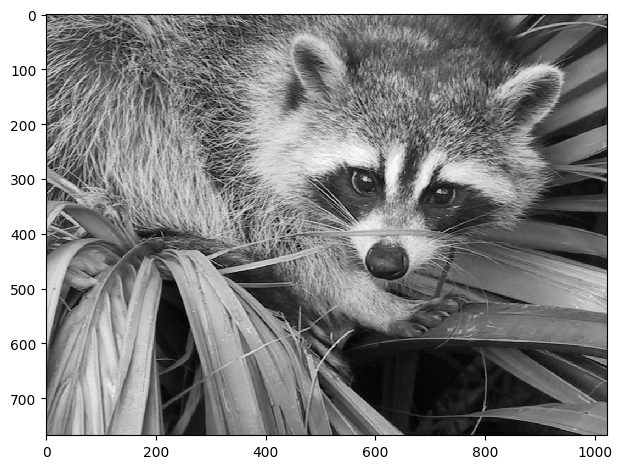

In [ ]:
io.imshow(output2)

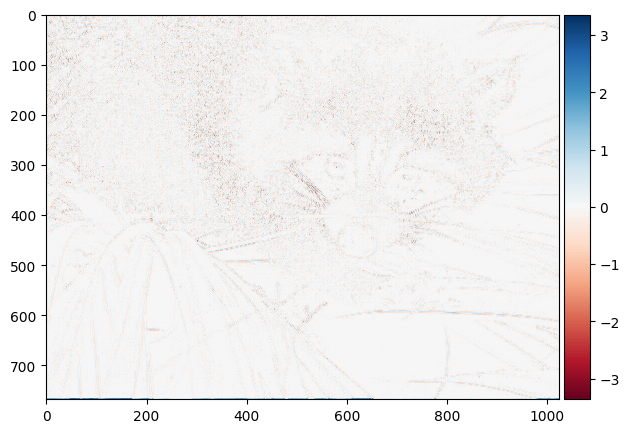

In [ ]:
io.imshow(output3)

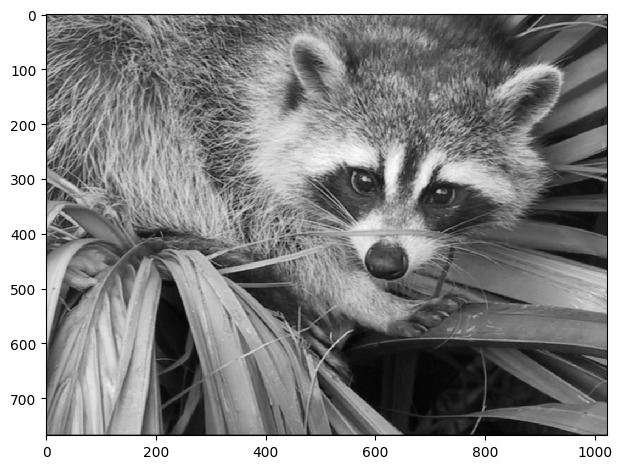

In [ ]:
io.imshow(output4)

## Dimensions (20 points)

What would be the output dimensions in these cases (input size is NxN)?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account the padding option and the stride. 

'Zero padding' means that we padded by floor(kernel_sz/2) in every dimension

In [ ]:
# Write your answer here

### Answer:
The output dimensions of a convolutional layer can be calculated using the following formula:

Output dimension = ((N - F + 2P) / S) + 1
where N is the input dimension, F is the kernel size, P is the padding size, and S is the stride.

#### 1. No padding, stride of 1:
Output dimension = ((N - F + 2P) / S) + 1 = ((N - F + 0) / 1) + 1 = (N - F + 1)

#### 2. No padding, stride of 2:
Output dimension = ((N - F + 2P) / S) + 1 = ((N - F + 0) / 2) + 1 = ((N - F)/2) + 1

#### 3. Zero padding, stride of 1:
Output dimension = ((N - F + 2P) / S) + 1 = ((N - F + 2*(floor(F/2))) / 1) + 1 = (N + 2*(floor(F/2)) - F + 1)

#### 4. Zero padding, stride of 2:
Output dimension = ((N - F + 2*(floor(F/2))) / S) + 1 =
 ((N - F + 2*(floor(F/2))) / 2) + 1 = ((N + 2*(floor(F/2)) - F)/2) + 1

For convolutions with kernels of size F = 3x3, 5x5, 7x7, etc., the output dimensions will depend on the input dimensions and the padding/stride options as described above.

I is important to say that if the output dimension is less than 1, then the convolutional layer cannot be applied to the input size.



```
# This is formatted as code
```

### Network dimensions (40 points)
Below is a network architecture suggestion for classificy MNIST data.
Write: \\
(1) the output dimensions of evrry layer in the format (C,W,H) -> (#channels, width, height) \\
(2) the number of parameters at every layer \\
(3) number of calculations made in each layer

- Convolutional Layer #1: Applies 32 5x5 filters, with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


In [ ]:
# Write your answer here

## Answer:

Assuming the input size is (1, 28, 28) for MNIST data, the output dimensions of each layer in the format (C- Channels,W - width,H - height) and the number of parameters and calculations for each layer would be:

### Convolutional Layer #1  (Applies 32 5x5 filters, with ReLU activation function):
______________________________________________________________
**Output dimensions**: (32, 24, 24) *{(28-5+0)/1 +1 = 24}*

**Number of parameters**: 832 = (32 x 5 x 5 x 1) + 32 *{bias = 32*1}*

**Number of calculations**  921,600 = (32 x 5 x 5 x 24 x 24 x 2)


### Pooling Layer #1 (max pooling with a 2x2 filter and stride of 2):
________________________________________________________________
**Output dimensions**: (32, 12, 12)  *{24/2 = 2}*

**Number of parameters**: 0  * no parameters to optimize only pulling

**Number of calculations** 4,608 = (32 x 12 x 12) 


### Convolutional Layer #2 (64 5x5 filters, with ReLU activation function)
___________________________________________________________________________

**Output dimensions**: (64, 8, 8)  *{(12-5+0)/1+1 = 8}*

**Number of parameters**: 51,264 = (64 x 5 x 5 x 32) + 64  *{bias = 64*1}*

**Number of calculations**:6,553,600 = (64 x 5 x 5 x 32 x 8 x 8 X 2)


### Pooling Layer #2 (max pooling with a 2x2 filter and stride of 2):
___________________________________________________________________________


**Output dimensions**: (64, 4, 4)

**Number of parameters**: 0  * no parameters to optimize only pulling

**Number of calculations** 1,024 =  (64  x 4 x 4)



### Dense Layer #1 ( 1,024 neurons, with dropout regularization rate of 0.4 )
___________________________________________________________________________


**Output dimensions**: (1, 1, 1024)

**Number of parameters**: 1,049,600 = (64 x 4 x 4 x 1024) + 1024 

** including dropouts**:

**Number of calculations**: 2,097,152 = (64 x 4 x 4 x 1024 x 2) 


** including dropouts**: 1,258,291 = 2,097,152 * 0.6


### Dense Layer #2 (Logits Layer): 10 neurons
___________________________________________________________________________


**Output dimensions**: (1, 1, 10)

**Number of parameters**: 10,250 = (10 x 1024) + 10

**Number of calculations**: 20,480 =  1024 X 10 X 2 

Note that the number of parameters in a layer depends on the number of input channels, the number of output channels, and the kernel/filter size. The number of calculations in a layer is equal to the number of output channels times the number of output pixels times the number of parameters.

In [ ]:
(Height / Stride) x Depth x (Width / Stride)